#Language Translation Using Seq2Seq


## Data Prepartion

In [13]:
# Importing Necessory Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('eng_-french.csv')

## Exploratory Data Analysis

In [15]:
df.head(5)

,English words/sentences,French words/sentences
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !


In [16]:
df.shape

(175621, 2)

In [17]:
df.size

351242

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175621 entries, 0 to 175620
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   English words/sentences  175621 non-null  object
 1   French words/sentences   175621 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [19]:
df.describe()

,English words/sentences,French words/sentences
count,175621,175621
unique,123100,165975
top,I can't tell you how happy I am that you've co...,C'est bizarre.
freq,32,9


In [20]:
df.isnull().sum()

,0
English words/sentences,0
French words/sentences,0


In [21]:
df.nunique().sum()

289075

In [22]:
df.duplicated().sum()

0

## Data Visualization

In [23]:
# Making Copy of dataframe for Data Visualization

df_dv = df.copy()

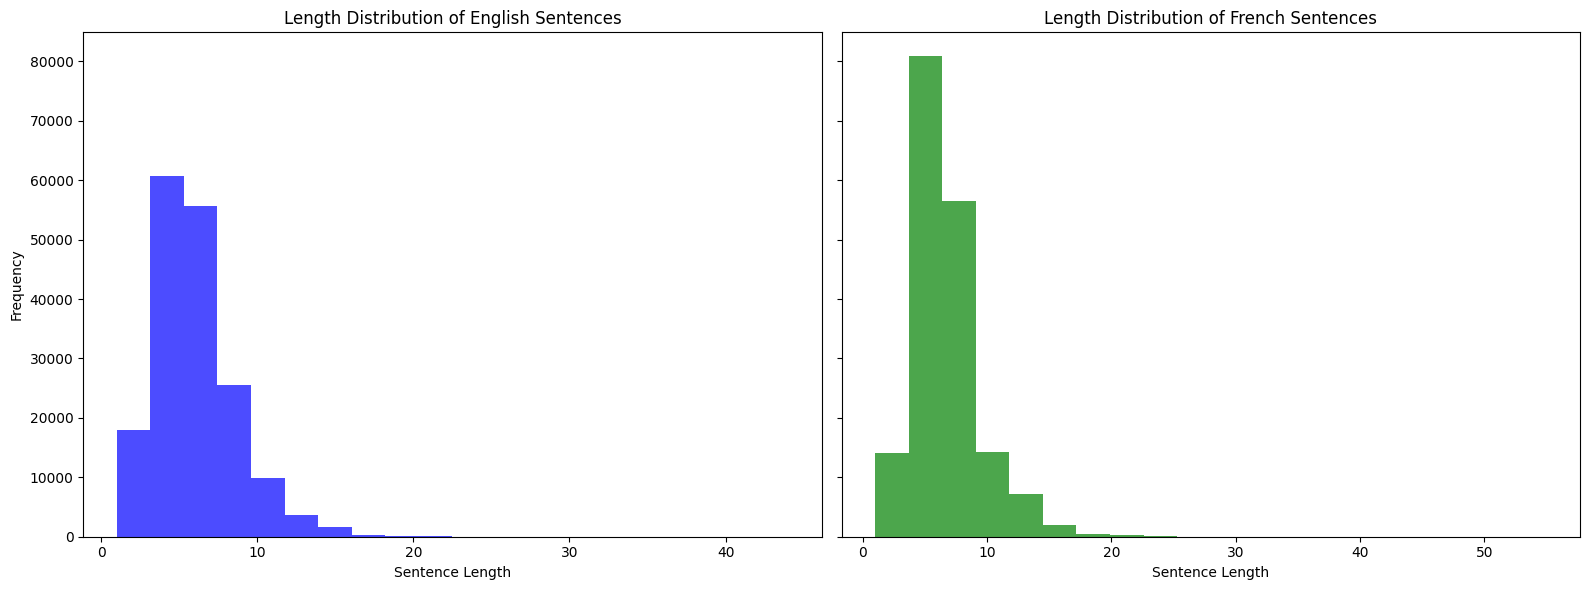

In [24]:
# Visualizing the length distribution of English and French sentences

df_dv['english_length'] = df_dv['English words/sentences'].str.split().str.len()
df_dv['french_length'] = df_dv['French words/sentences'].str.split().str.len()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for English sentence lengths
axes[0].hist(df_dv['english_length'], bins=20, alpha=0.7, color='blue')
axes[0].set_xlabel('Sentence Length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Length Distribution of English Sentences')

# Plot for French sentence lengths
axes[1].hist(df_dv['french_length'], bins=20, alpha=0.7, color='green')
axes[1].set_xlabel('Sentence Length')
axes[1].set_title('Length Distribution of French Sentences')

plt.tight_layout()
plt.show()


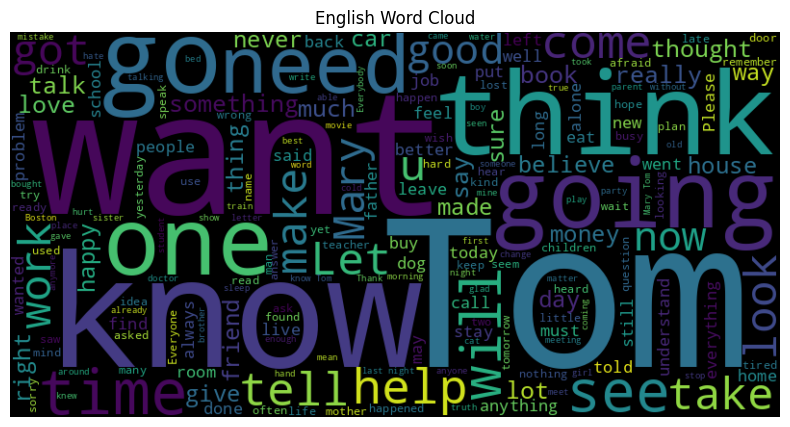

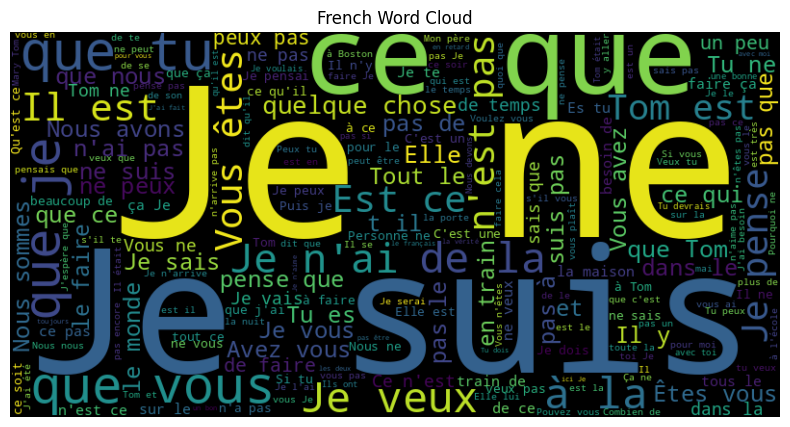

In [25]:
# Visualizing most frequency words

from wordcloud import WordCloud

english_text = ' '.join(df_dv['English words/sentences'])
french_text = ' '.join(df_dv['French words/sentences'])

english_wordcloud = WordCloud(width=800, height=400).generate(english_text)
french_wordcloud = WordCloud(width=800, height=400).generate(french_text)

plt.figure(figsize=(10, 5))
plt.imshow(english_wordcloud, interpolation='bilinear')
plt.title('English Word Cloud')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(french_wordcloud, interpolation='bilinear')
plt.title('French Word Cloud')
plt.axis('off')
plt.show()

<Axes: >

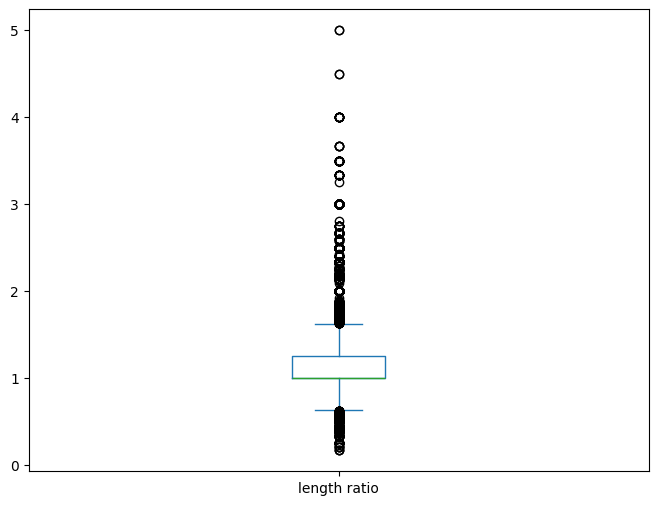

In [26]:
# Plotting Sentence Pair Length Ratio

df_dv['length ratio'] = df_dv['french_length'] / df_dv['english_length']
df_dv['length ratio'].plot(kind='box', figsize=(8, 6))

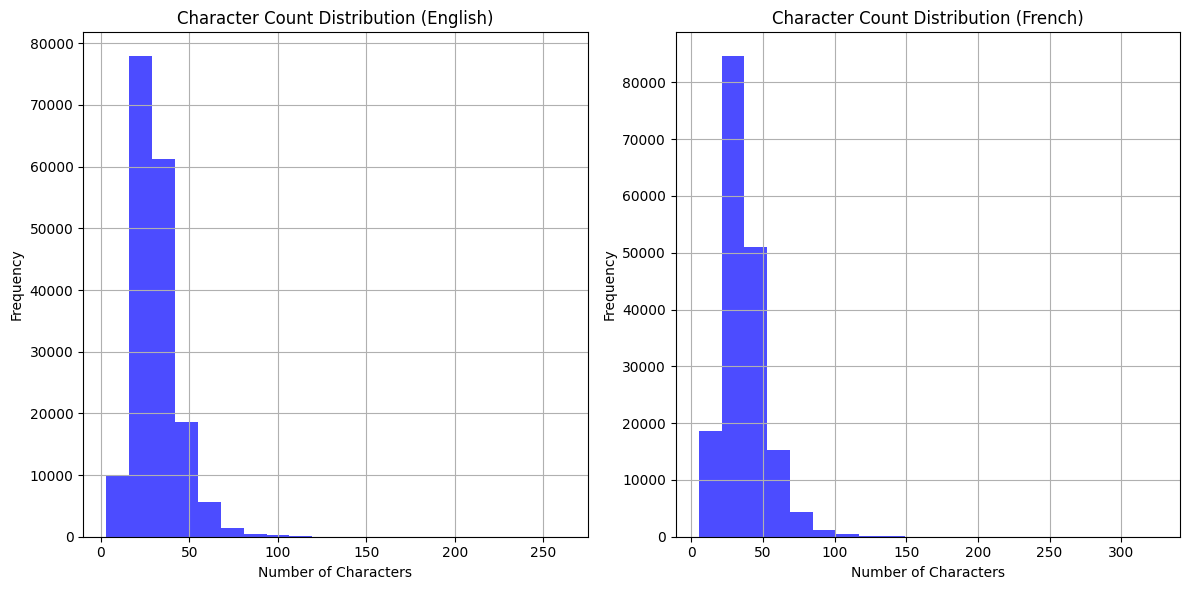

In [27]:
# Visualizing Character Count Distribution:

df_dv['english_char_count'] = df_dv['English words/sentences'].apply(len)
df_dv['french_char_count'] = df_dv['French words/sentences'].apply(len)

ax = df_dv[['english_char_count', 'french_char_count']].hist(
    bins=20, figsize=(12, 6), color=['blue'], alpha=0.7
)

ax[0][0].set_title("Character Count Distribution (English)")
ax[0][0].set_xlabel("Number of Characters")
ax[0][0].set_ylabel("Frequency")

ax[0][1].set_title("Character Count Distribution (French)")
ax[0][1].set_xlabel("Number of Characters")
ax[0][1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

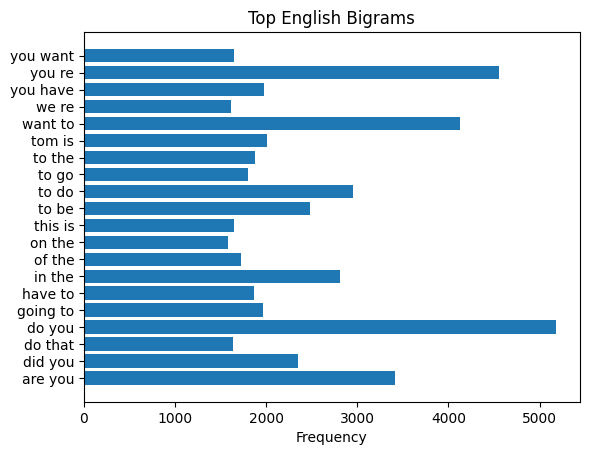

In [28]:
# N-gram Analysis

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
english_ngrams = vectorizer.fit_transform(df_dv['English words/sentences'])
ngram_counts = english_ngrams.sum(axis=0).A1
ngram_features = vectorizer.get_feature_names_out()

plt.barh(ngram_features, ngram_counts)
plt.title('Top English Bigrams')
plt.xlabel('Frequency')
plt.show()

## Data Cleaning

In [29]:
# Renaming the column

df.rename(columns={'English words/sentences': 'English'}, inplace=True)
df.rename(columns={'French words/sentences': 'French'}, inplace=True)

In [30]:
# Data Cleaning for English words

import re

def clean_english_text(text):
    text = text.lower()  # Converting text to lowercase
    contractions = {     # Handling Contraction
        "i'm": "i am", "you're": "you are", "it's": "it is",
        "can't": "cannot", "don't": "do not", "didn't": "did not",
        "i've": "i have", "we're": "we are", "isn't": "is not",
        "won't": "will not", "aren't": "are not"
    }
    for contraction, full_form in contractions.items():
        text = re.sub(r'\b{}\b'.format(contraction), full_form, text)

    text = re.sub(r"[^a-z\s]+", "", text)     # Removing Non-Alphabetic Characters
    text = re.sub(r'\s+', ' ', text).strip()  # Collapsing Extra Whitespace
    return text

In [31]:
# Data Cleaning for French words

def clean_french_text(text):
    text = text.lower()      # Converting text to lowercase
    contractions = {         # Handling Contraction
        "c'est": "ce est", "j'ai": "je ai", "il y a": "il y avoir",
        "n'est": "ne est", "qu'est": "que est", "d'accord": "de accord"
    }
    for contraction, full_form in contractions.items():
        text = re.sub(r'\b{}\b'.format(contraction), full_form, text)

    text = re.sub(r"[^a-z\u00e0\u00e8\u00e9\u00e2\u00ea\u00ee\u00f4\u00fb\u00e7\u00f9\u00ef\u00fc\u0153\s]+", "", text) # Removing Non-Alphabetic Characters
    text = re.sub(r'\s+', ' ', text).strip()  # Collapsing Extra Whitespace
    return text

In [32]:
# Applying Text Cleaning

df["English"] = df["English"].apply(clean_english_text)
df["French"] = df["French"].apply(clean_french_text)

## Data Preprocessing

In [33]:
# Adding Special Tokens for French Sequences

df["French"] = df["French"].apply(lambda x: f"<start> {x} <end>")

In [34]:
# Extracting Clean Sentences

english_sentences = df["English"].tolist()
french_sentences = df["French"].tolist()
print("Cleaned English Sentences:", english_sentences[:5])
print("Cleaned French Sentences:", french_sentences[:5])

Cleaned English Sentences: ['hi', 'run', 'run', 'who', 'wow']
Cleaned French Sentences: ['<start> salut <end>', '<start> cours <end>', '<start> courez <end>', '<start> qui <end>', '<start> ça alors <end>']


In [35]:
# Train test and split

from sklearn.model_selection import train_test_split

train_english, test_english, train_french, test_french = train_test_split(
    df["English"], df["French"],
    test_size=0.2,
    random_state=42
)

In [36]:
# Tokenization and Padding

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_text(tokenizer, texts, max_len):
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_sequences(sequences, maxlen=max_len, padding='post')

max_vocab_size = 10000
max_sequence_length = 50

english_tokenizer = Tokenizer(num_words=max_vocab_size)
english_tokenizer.fit_on_texts(train_english)

french_tokenizer = Tokenizer(num_words=max_vocab_size)
french_tokenizer.fit_on_texts(train_french)

train_english_padded = preprocess_text(english_tokenizer, train_english,max_sequence_length)
train_french_padded = preprocess_text(french_tokenizer, train_french,max_sequence_length)
test_english_padded = preprocess_text(english_tokenizer, test_english,max_sequence_length)
test_french_padded = preprocess_text(french_tokenizer, test_french,max_sequence_length)

# Preparing decoder target sequences
train_decoder_target_data = train_french_padded[:, 1:]
train_decoder_target_data = pad_sequences(train_decoder_target_data, maxlen=max_sequence_length, padding='post')

english_vocab_size = len(english_tokenizer.word_index) + 1
french_vocab_size = len(french_tokenizer.word_index) + 1

## Model Building

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Bidirectional, Concatenate, Layer
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
# Custom Attention Layer

class AttentionLayer(Layer):
    def call(self, inputs):
        decoder_outputs, encoder_outputs = inputs
        attention_scores = tf.matmul(decoder_outputs, encoder_outputs, transpose_b=True)
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)
        context_vector = tf.matmul(attention_weights, encoder_outputs)
        return context_vector

In [39]:
# Sequence-to-sequence model with Bidirectional LSTM for the encoder and an Attention Mechanism for aligning the input and output sequences

encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(input_dim=english_vocab_size, output_dim=256, mask_zero=True)(encoder_inputs)
encoder_lstm = Bidirectional(LSTM(256, return_sequences=True, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_lstm(encoder_embedding)
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(input_dim=french_vocab_size, output_dim=256, mask_zero=True)(decoder_inputs)
decoder_lstm = LSTM(512, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

attention_layer = AttentionLayer()
attention_result = attention_layer([decoder_outputs, encoder_outputs])
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention_result])

decoder_dense = Dense(french_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [41]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, None, 256)      │      3,432,448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, None)           │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ [(None, None, 512),    │      1,050,624 │ embedding[0][0],       │
│ (Bidirectional)           │ (None, 256), (None,    │                │ not_equal[0][0]        │
│                           │ 256), (None, 256),     │                │                        │
│                           │ (None, 256)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 256)      │      6,824,704 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 512)            │              0 │ bidirectional[0][1],   │
│                           │                        │                │ bidirectional[0][3]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 512)            │              0 │ bidirectional[0][2],   │
│ (Concatenate)             │                        │                │ bidirectional[0][4]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 512),    │      1,574,912 │ embedding_1[0][0],     │
│                           │ (None, 512), (None,    │                │ concatenate[0][0],     │
│                           │ 512)]                  │                │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer           │ (None, None, 512)      │              0 │ lstm_1[0][0],          │
│ (AttentionLayer)          │                        │                │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, None, 1024)     │              0 │ lstm_1[0][0],          │
│ (Concatenate)             │                        │                │ attention_layer[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 26659)    │     27,325,475 │ concatenate_2[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 40,208,163 (153.38 MB)

 Trainable params: 40,208,163 (153.38 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [43]:
model.fit(
    [train_english_padded, train_french_padded],
    np.expand_dims(train_decoder_target_data, -1),
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    callbacks=[early_stopping_callback]
)

Epoch 1/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 673s 379ms/step - accuracy: 0.8852 - loss: 1.0115 - val_accuracy: 0.9368 - val_loss: 0.3459
Epoch 2/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 656s 366ms/step - accuracy: 0.9439 - loss: 0.2870 - val_accuracy: 0.9508 - val_loss: 0.2428
Epoch 3/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 712s 383ms/step - accuracy: 0.9584 - loss: 0.1821 - val_accuracy: 0.9554 - val_loss: 0.2110
Epoch 4/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 654s 367ms/step - accuracy: 0.9664 - loss: 0.1343 - val_accuracy: 0.9575 - val_loss: 0.2000
Epoch 5/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 683s 368ms/step - accuracy: 0.9720 - loss: 0.1056 - val_accuracy: 0.9587 - val_loss: 0.1976


## Model Prediction

In [44]:
# Evaluate the model

test_decoder_target_data = test_french_padded[:, 1:]
test_decoder_target_data = pad_sequences(test_decoder_target_data, maxlen=max_sequence_length, padding='post')
loss, accuracy = model.evaluate(
    [test_english_padded, test_french_padded],
    np.expand_dims(test_decoder_target_data, -1)
)
print(f"Test Loss: {loss:.2f}, Test Accuracy: {accuracy:.2f}")

1098/1098 ━━━━━━━━━━━━━━━━━━━━ 79s 72ms/step - accuracy: 0.9588 - loss: 0.1946
Test Loss: 0.20, Test Accuracy: 0.96


In [53]:
# Creating Inference models with Attention Mechanism for Prediction

encoder_model = Model(encoder_inputs, [encoder_outputs] + encoder_states)

decoder_state_input_h = Input(shape=(512,))
decoder_state_input_c = Input(shape=(512,))
decoder_hidden_states_input = Input(shape=(max_sequence_length, 512))

decoder_lstm_outputs, state_h_decoded, state_c_decoded = decoder_lstm(
    decoder_embedding,
    initial_state=[decoder_state_input_h, decoder_state_input_c]
)
attention_result_decoded = attention_layer([decoder_lstm_outputs, decoder_hidden_states_input])
decoder_concat_input_decoded = Concatenate(axis=-1)([decoder_lstm_outputs, attention_result_decoded])
decoder_outputs_decoded = decoder_dense(decoder_concat_input_decoded)

decoder_model = Model(
    [decoder_inputs] + [decoder_state_input_h, decoder_state_input_c, decoder_hidden_states_input],
    [decoder_outputs_decoded] + [state_h_decoded, state_c_decoded]
)

In [54]:
# Decoding a sequence of tokens from the model’s output during inference

reverse_french_vocab = {i: word for word, i in french_tokenizer.word_index.items()}

def decode_sequence(input_seq):
    encoder_outputs, state_h, state_c = encoder_model.predict(input_seq, verbose=0)
    states_value = [state_h, state_c]
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = french_tokenizer.word_index.get('<start>', 0)

    decoded_sentence = ''
    for _ in range(max_sequence_length):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value + [encoder_outputs],verbose=0)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = reverse_french_vocab.get(sampled_token_index, '')

        if sampled_word == '<end>':
            break

        decoded_sentence += ' ' + sampled_word
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return decoded_sentence.replace('end','').strip()

In [58]:
# Comparing the Actual and Predicted Output

import random
translations = []
random_indices = random.sample(range(len(test_english_padded)), 10)

for i in random_indices:
    input_seq = test_english_padded[i:i + 1]
    translated_sentence = decode_sequence(input_seq)
    actual_sentence = test_french.iloc[i]
    translations.append({"Actual": actual_sentence, "Predicted": translated_sentence})

translations_df = pd.DataFrame(translations)
translations_df

,Actual,Predicted
0,<start> vous prêchez une convaincue <end>,vous mentez
1,<start> tom ne peut pas sen empêcher <end>,tom ne estce pas
2,<start> je ai eu un bon entraîneur <end>,je me suis
3,<start> comment va votre sœur aujourdhui <end>,quelle est ta sœur aujourdhui
4,<start> de quelle couleur sont tes cheveux <end>,quelle couleur que estce
5,<start> elle chanta mieux que lui <end>,elle a bien le plus
6,<start> je ne pense pas avoir besoin de votre ...,je pense que je ai besoin de votre aide aujour...
7,<start> je capte pas <end>,je ne le blâme pas
8,<start> il vous faut trouver du travail <end>,vous devez le travail
9,<start> je ne veux pas vivre tout seul ici <end>,je veux le seul moimême
